In [2]:
#import da biblioteca pandas    
import pandas as pd

importação e vizualização de **dados** 



In [3]:
#LEITURA DOS ARQUIVOS
df1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Aracaju.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Fortaleza.xlsx')
df3 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Natal.xlsx')
df4 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Recife.xlsx')
df5 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Salvador.xlsx')

In [4]:
#concatener todos os arquivos em um 
df = pd.concat([df1, df2, df3, df4, df5])

In [5]:
df.head(10)

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8
5,Aracaju,2018-01-01,156.20,1522,1
6,Aracaju,2018-01-01,35.50,1522,2
7,Aracaju,2019-01-01,172.22,1522,6
8,Aracaju,2019-01-01,12.16,1523,1
9,Aracaju,2019-01-01,149.36,1523,3


In [6]:
#verificar os tipos de dados 
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [7]:
#modificar o tipo de dados da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [8]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [9]:
#verificar valores nulos 
df.isnull().sum()

Cidade    0
Data      0
Vendas    5
LojaID    0
Qtde      0
dtype: int64

In [10]:
#preencher os valores nulos de vendas pela média 
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [11]:
#verificar valores nulos 
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [12]:
#criando uma nova coluna 
df["Receita"]= df["Vendas"].mul(df["Qtde"])

In [13]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [14]:
#buscado o maior valor 
df["Receita"].max()

3544.0

In [15]:
#buscado o menor valor 
df["Receita"].max()

3544.0

In [16]:
#exibindo o top 3 linhas de maioires receitas 
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [17]:
#exibindo o top 3 linhas de mnenores receitas 
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [18]:
#agrupando por cidade   
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.250000
Fortaleza     38698.562115
Natal        167227.520000
Recife        51936.510000
Salvador      40596.730000
Name: Receita, dtype: float64

In [19]:
#Ordenando o conjunto de dados 
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


In [20]:
df.dtypes


Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

** **negrito**Trabalhando com datas **

In [21]:
#agrupando a receita por ano 
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.530000
2019    229031.042115
Name: Receita, dtype: float64

In [22]:
#criando uma nova coluna com o ano 
df["Ano_venda"] = df["Data"].dt.year 

In [23]:
df


,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018
...,...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84,2019
236,Salvador,2019-01-03,126.29,1035,3,378.87,2019
237,Salvador,2019-01-03,38.06,1036,3,114.18,2019
238,Salvador,2019-01-03,139.64,1035,1,139.64,2019


In [24]:
#extraindo mes e dia 
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [25]:
df

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018,1,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018,1,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018,1,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018,1,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018,1,1
...,...,...,...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84,2019,1,3
236,Salvador,2019-01-03,126.29,1035,3,378.87,2019,1,3
237,Salvador,2019-01-03,38.06,1036,3,114.18,2019,1,3
238,Salvador,2019-01-03,139.64,1035,1,139.64,2019,1,3


In [26]:
#data mais antiga 
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [27]:
#calculando a diferença entre dias 
df["diferença_dias"] = df["Data"] - df["Data"].min()

In [28]:
df

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda,diferença_dias
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018,1,1,0 days
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018,1,1,0 days
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018,1,1,0 days
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018,1,1,0 days
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018,1,1,0 days
...,...,...,...,...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84,2019,1,3,367 days
236,Salvador,2019-01-03,126.29,1035,3,378.87,2019,1,3,367 days
237,Salvador,2019-01-03,38.06,1036,3,114.18,2019,1,3,367 days
238,Salvador,2019-01-03,139.64,1035,1,139.64,2019,1,3,367 days


In [29]:
#ciando uma coluna de tremestre 
df["trimestre"]=df["Data"].dt.quarter

In [30]:
df

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda,diferença_dias,trimestre
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018,1,1,0 days,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018,1,1,0 days,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018,1,1,0 days,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018,1,1,0 days,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018,1,1,0 days,1
...,...,...,...,...,...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84,2019,1,3,367 days,1
236,Salvador,2019-01-03,126.29,1035,3,378.87,2019,1,3,367 days,1
237,Salvador,2019-01-03,38.06,1036,3,114.18,2019,1,3,367 days,1
238,Salvador,2019-01-03,139.64,1035,1,139.64,2019,1,3,367 days,1


In [31]:
#filtrando as vendas em um mes especifico 
vendas_março_2019 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [32]:
vendas_março_2019 

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda,diferença_dias,trimestre
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,425 days,1


In [33]:
df.loc[df["trimestre"]==2]

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda,diferença_dias,trimestre
9,Natal,2018-05-02,261.0,852,3,783.0,2018,5,2,121 days,2
14,Natal,2018-06-03,660.0,853,3,1980.0,2018,6,3,153 days,2
20,Natal,2018-06-08,608.0,852,4,2432.0,2018,6,8,158 days,2
22,Natal,2018-06-21,621.0,853,3,1863.0,2018,6,21,171 days,2
24,Natal,2018-04-22,868.0,854,3,2604.0,2018,4,22,111 days,2
31,Natal,2018-04-03,401.0,854,4,1604.0,2018,4,3,92 days,2
41,Natal,2018-05-20,835.0,852,4,3340.0,2018,5,20,139 days,2
43,Natal,2019-04-01,538.0,853,3,1614.0,2019,4,1,455 days,2
49,Natal,2019-04-01,831.0,852,2,1662.0,2019,4,1,455 days,2
52,Natal,2018-04-27,778.0,854,4,3112.0,2018,4,27,116 days,2


In [34]:
#contagem de repetições de um valor 
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

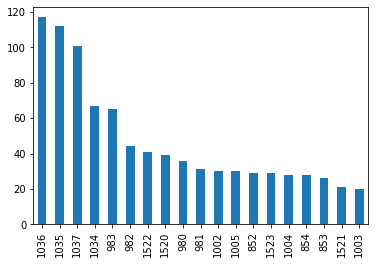

In [35]:
#contagem de repetições de um valor em grafico 
df["LojaID"].value_counts(ascending=False).plot.bar()

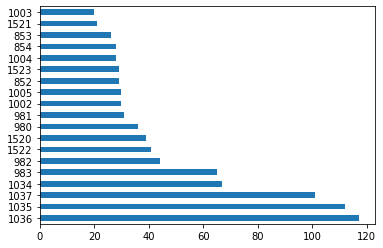

In [36]:
#contagem de repetições de um valor em barra horizontal
df["LojaID"].value_counts(ascending=False).plot.barh()

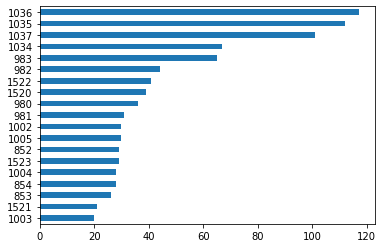

In [37]:
#contagem de repetições de um valor em barra horizontal
df["LojaID"].value_counts(ascending=True).plot.barh();

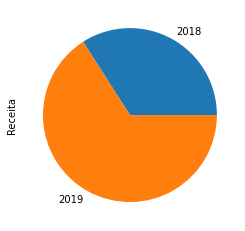

In [40]:
#gráfico de pizza 
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [42]:
#total vendas por cidade 
df["Cidade"].value_counts()

Salvador     240
Natal        240
Recife       142
Fortaleza    142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'total Vendas')

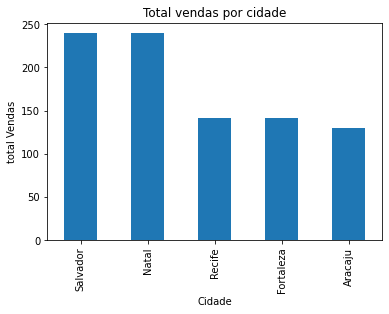

In [46]:
#adicionando titulo e nome aos eixos 
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por cidade");
plt.xlabel("Cidade")
plt.ylabel("total Vendas")

In [47]:
#alterando o estilo 
plt.style.use("ggplot")

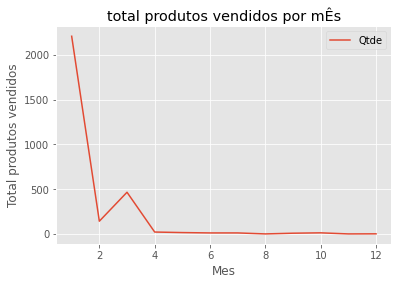

In [51]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "total produtos vendidos por mÊs")
plt.xlabel("Mes")
plt.ylabel("Total produtos vendidos")
plt.legend()

In [52]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [53]:
#utilizando apenas as vendas de 2019
df_2019 = df[df["Ano_venda"]==2019]

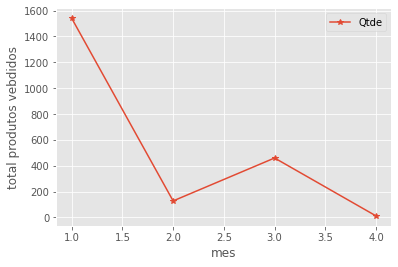

In [56]:
#total produtos vendidos por mes 
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker='*')
plt.xlabel("mes")
plt.ylabel("total produtos vebdidos")
plt.legend()

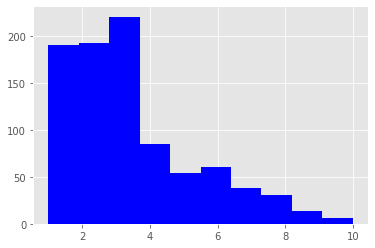

In [58]:
#histograma 
plt.hist(df['Qtde'], color='blue');

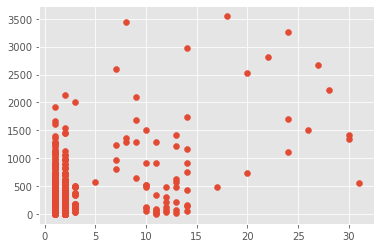

In [60]:
plt.scatter(x=df_2019['dia_venda'], y=df_2019['Receita']);

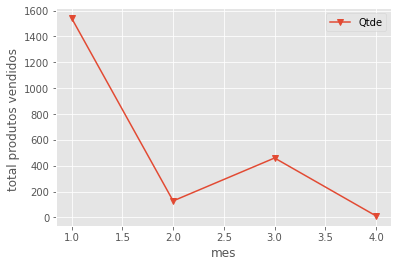

In [61]:
#salvando os png
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker ='v')
plt.xlabel("mes")
plt.ylabel("total produtos vendidos ");
plt.legend()
plt.savefig('grafico Qtde x mes.png')